# figure 2, the obscured pendulum 

In [1]:
import numpy as np
from scipy.integrate import odeint  
from operator import sub 
import controlpy   
import pickle

from matplotlib import  rc    
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import rcParams 

import sys 
import  os 

# append function path to system
base_path = os.path.dirname( os.getcwd()  )  
function_path = os.path.join(  base_path, 'functions') 
sys.path.append(function_path ) 
 
figs_path = os.path.join(  base_path, 'figs') 
data_path = os.path.join(  base_path, 'data')
    
# import custom functions 
from figure_settings import *    
import figure_functions as ff
import phasediagram as phd
import singlependulum as sp  

In [2]:
# General Plotting Parameters 
fig_dim = (3.2, 3 ) 
fig_name = 'fig2_obscured_pendulum'  
LQR_limit = 0.3

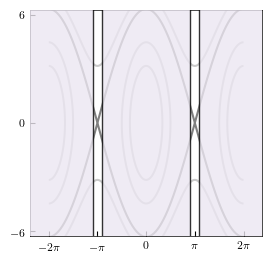

In [3]:
 
              
fig_dim = (3,3)
fig, ax0 = plt.subplots(1,1,figsize =fig_dim, dpi = 100) 
ff.plot_state_space(ax0, contour_col= contour_col, 
                    obscure_col=obscure_col,obscure_edge=obscure_edge,
                   obscure_alpha = obscure_alpha, homoclinic_col = homoclinic_col  ) 

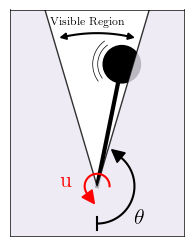

In [4]:
def draw_obscured_pendulum(ax_p): 

    # set parameters -------------------------------------------
    ax_p.set_xlim( ( np.array([-.7,.7])  ))
    ax_p.set_ylim( ( np.array([-0.4,1.42]) )) 
    ax_p.set_aspect('equal') 
    dot_scale = [50,600]  # size of pendulum bulb 
    window =  1.2 # set window size as multiple of pendulum length 
 
    circle_rad = 0.15
    # draw pendulum 
    y0 = np.array([ np.pi -0.2 , 0])  
    x_pos = np.sin(y0[0]) 
    y_pos = -np.cos(y0[0 ])
    circle1 = plt.Circle((x_pos, y_pos), circle_rad , color='k',zorder = -6) 
    ax_p.add_artist(circle1)

    ax_p.plot( [0,x_pos], [0,y_pos] , color='k',lineWidth = 3 ,zorder = -6)  

    # draw theta arrow 
    thet = np.linspace(np.pi*0,np.pi - 0.7,101)
    r = 0.3
    x = np.sin(thet)*r
    y = -np.cos(thet)*r 
    ax_p.plot(x,y,'k')
    phd.draw_arrow( x[-1],y[-1],  thet[-1]   , ax_p,0.1) 
    ax_p.plot( [0,0], [-0.35,-0.25],'k') 
    ax_p.annotate(r'$\theta$' , xy=( 0.3,-0.3),fontsize= 16)

    # draw theta arrow --------------------------------------------
    thet = np.linspace(np.pi*0.5,np.pi*1.7 ,101)
    r = 0.1
    x = np.sin(thet)*r
    y = -np.cos(thet)*r 
    ax_p.plot(x,y,'r')
    phd.draw_arrow( x[-1],y[-1],  thet[-1]   , ax_p,0.1,facecolor='r', edgecolor='r') 
    # ax_p.plot( [0,0], [-0.35,-0.25],'r') 
#     ax_p.annotate(r'$\tau$' , xy=( -0.2,0),fontsize= 16,color='r')
    ax_p.annotate(r'u' , xy=( -0.3,0),fontsize= 16,color='r')

    L1 = 1.8
    x  = np.array([-L1,-np.sin( LQR_limit)*L1, 0,np.sin( LQR_limit)*L1,L1,L1,-L1]) 
    y = np.array([L1,L1,0,L1,L1,-L1,-L1])
    ax_p.fill(x,y,zorder = 0, facecolor = obscure_col, edgecolor=obscure_edge ,  alpha = obscure_alpha ) 

    # axis adjust-------------------------------------------
    ax_p.tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        left=False,      # ticks along the left edge are off
        right=False,         # ticks along the right edge are off
        labelbottom=False,         # ticks along the top edge are off
        labelleft=False) # labels along the bottom edge are off
    
    # draw visible arc --------------------------------------------
    thet = np.linspace(np.pi-0.2 ,np.pi+0.2  ,101)
    r = 1.23
    x = np.sin(thet)*r
    y = -np.cos(thet)*r  
    phd.draw_arrow( x[-1],y[-1],  thet[-1]   , ax_p,0.05,facecolor='k', edgecolor='k' ) 
    phd.draw_arrow( x[0],y[0],  thet[0]+np.pi  , ax_p,0.05,facecolor='k', edgecolor='k')  
    ax_p.plot(x,y,'k')
    ax_p.text(-0.38,1.29,'Visible Region',fontsize=8)
    

    # draw motion arc 
    L = 0.98
    thet = np.linspace( np.pi*1.2,np.pi*1.7   ,101) 
    rad_list  = circle_rad + np.array([0.04,0.08] ) 
    for r in rad_list: 
        x = np.sin(thet)*r
        y = -np.cos(thet)*r
        ax_p.plot(x + L*np.sin(y0[0]),y+ L*np.cos(y0[1]),'k', linewidth =0.5) 
        
          
fig_dim = (3,3)
fig, ax0 = plt.subplots(1,1,figsize =fig_dim, dpi = 100)
# call plot functions 
draw_obscured_pendulum(ax0)

# plot and save combined image

Saving to: D:\Mijn_documenten\Dropbox\A_PhD\C_Papers\ch_neuralControl\timed_feedforward_control\figs\fig2_obscured_pendulum.png and .pdf


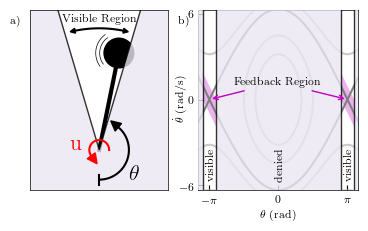

In [ ]:
fig_dim = (3.2,3)
fig = plt.figure( figsize= fig_dim,dpi = 100)

h = .6
dx1 = 0.5
dx2= 0.5
dw = 0.06
ax0= plt.axes([ 0 , 0 , dx1 ,  h] )  
ax1= plt.axes([ dx1+dw ,0 , dx2, h])  # standard axes 
# ax2= plt.axes([ dx1+dw+dx2+dw ,0 , dx3 ,  h] )   

draw_obscured_pendulum(ax0 )

ff.plot_state_space(ax1, contour_col= contour_col, 
                    obscure_col=obscure_col,obscure_edge=obscure_edge,
                   obscure_alpha = obscure_alpha, homoclinic_col = homoclinic_col  )   

yl =  -4
ax1.text( -np.pi-0.2 ,yl,'visible',rotation = 90 , fontsize = 8) 
ax1.text( -.2 ,yl ,'denied',rotation = 90 , fontsize = 8 ,zorder  = 8)
ax1.text( np.pi-0.2,yl,'visible' ,rotation = 90 , fontsize = 8) 
  
ax1.set_xlim([-np.pi-0.5,np.pi+0.5])

ax1.set_xlabel(r'$\theta$ (rad)' )
ax1.set_ylabel(r'$\dot{\theta}$ (rad/s)',   va = 'top',)  

label_dict = dict( fontsize =8 , fontweight='bold' )   
# ff.label_axes(fig,labels =['a)','b)'], loc=(-0.15,0.95 ) , **label_dict  )
ff.label_axes2(fig,labels =['a)','b)','c)','d)'], loc=(-0.2,0.92 ) , **label_dict   )




dx =  LQR_limit  
x_points = np.array([-dx, dx, dx, -dx])+np.pi
y_points = np.array([1.,0,-1.,0])*1.88
ax1.fill( x_points, y_points,facecolor=lqr_fill, zorder = -6,alpha=0.3) 
ax1.fill( x_points-2*np.pi, y_points,facecolor=lqr_fill, zorder = -6,alpha=0.3) 
ax1.annotate('Feedback Region', (-np.pi,0), (0-2,1) , fontsize = 8 ,
                  arrowprops=dict(arrowstyle='->', color=lqr_fill) , zorder = 10)
txt = ax1.annotate('Feedback Region', ( np.pi,0), (0-2,1) , fontsize = 8 ,
                   arrowprops=dict(arrowstyle='->', color=lqr_fill) , zorder = 10 )
txt.set_alpha( 0 ) 

ff.save_fig(fig, figs_path, fig_name)  